# Regression Notebook with PyGRN

In [1]:
from pygrn import grns, problems, evolution, config
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger



# Creation of the Regression problem
def f(t, f: float = 1, k: int = 3):
    """ Fourrier decomposition of a square signal

    Args:
        t (float): time
        f(float, optional): frequency. Defaults to 1. 
        k (int, optional): degree of decomposition. Defaults to 2.

    Returns:
        values
    """
    y = np.zeros(t.shape[0])
    for i in range(0, k):

        y += np.sin((2*i + 1) * 2*np.pi*f*t)/(2*i + 1)
    
    
    y /= (4/np.pi)
    
    # transform values between 0 and 1
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    
    return y

def f_lin(t):

    return t

class Regression(problems.base.Problem):
    def __init__(self, x_train, y_train):
        super().__init__("regression")
        self.namestr = "regression"
        self.nin = 1
        self.nout = 1
        self.cacheable = True

        self.x_train = x_train
        self.y_train = y_train

        
    def eval(self, grn):

        grn.setup()
        grn.warmup(25)
        fit = 0.0
        for i in range(max(self.x_train.shape)):
            grn.set_input(self.x_train[i])
            grn.step()
            fit += np.linalg.norm(grn.get_output().item() - self.y_train[i]).item()

        return 1-fit


In [ ]:
t = np.linspace(-1, 1, 500)
y = f(t, f=1, k=10)
    
# logger.remove()
logger.level("INFO")
grn = lambda : grns.DissetGRN()
problem = Regression(t, y)


grneat = evolution.Evolution(problem, grn, num_workers=10)
best_fit, best_ind = grneat.run(20)

best_fit_history = grneat.best_fit_history
logger.info("best fit: ", best_fit)
# problem.eval(grneat.best_grn)
    
# y_eval = f(t_eval)
best_grn = best_ind.grn

best_grn.setup()
best_grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    best_grn.set_input(t[i])
    best_grn.step()
    y_eval.append(best_grn.get_output().item())


plt.plot(t, y_eval, label="prediction")
plt.plot(t, y, '.', label="target")

plt.legend()
plt.figure(figsize=(10, 5))
plt.plot(best_fit_history)
plt.show()

KeyboardInterrupt: 

delta =  1.0113637521494716
belta =  1.057738915273828
[0.         0.33333333 0.33333333 0.33333333]
[0.01010101 0.33333333 0.33333333 0.33333333]
[0.02020202 0.33333333 0.33333333 0.33333333]
[0.03030303 0.33333333 0.33333333 0.33333333]
[0.04040404 0.33333333 0.33333333 0.33333333]
[0.05050505 0.33333333 0.33333333 0.33333333]
[0.06060606 0.33333333 0.33333333 0.33333333]
[0.07070707 0.33333333 0.33333333 0.33333333]
[0.08080808 0.33333333 0.33333333 0.33333333]
[0.09090909 0.33333333 0.33333333 0.33333333]
[0.1010101  0.33333333 0.33333333 0.33333333]
[0.11111111 0.33333333 0.33333333 0.33333333]
[0.12121212 0.33333333 0.33333333 0.33333333]
[0.13131313 0.33333333 0.33333333 0.33333333]
[0.14141414 0.33333333 0.33333333 0.33333333]
[0.15151515 0.33333333 0.33333333 0.33333333]
[0.16161616 0.33333333 0.33333333 0.33333333]
[0.17171717 0.33333333 0.33333333 0.33333333]
[0.18181818 0.33333333 0.33333333 0.33333333]
[0.19191919 0.33333333 0.33333333 0.33333333]
[0.2020202  0.33333333 0.

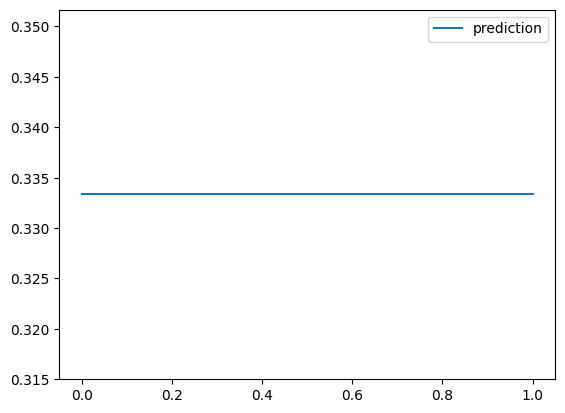

<Figure size 1000x500 with 0 Axes>

In [3]:
# test a random genome 
from pygrn import grns, problems, evolution, config
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger



grn = grns.ClassicGRN()
grn.random(1, 1, 2)
t = np.linspace(0, 1, 100)

print("delta = ", grn.delta)
print("belta = ", grn.beta)
grn.setup()
grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    grn.set_input(t[i])
    grn.step()

    print(grn.concentration)
    y_eval.append(grn.get_output().item())

plt.plot(t, y_eval, label="prediction")
# plt.plot(t, y, label="target")

plt.legend()
plt.figure(figsize=(10, 5))
# plt.plot(best_fit_history)
plt.show()

# Double the frequence of a sinus
- see [1] for explanantion 

In [1]:
import numpy as np
import numba
from pygrn import grns, problems, evolution, config
from pygrn.problems import double
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger

class DoubleFreq(problems.base.Problem):


    def __init__(self, namestr="double_frequence", period = 2 ): 

        super().__init__(namestr)
        self.nin = 1
        self.nout = 1
        self.cacheable = True

        self.T = period

        t = np.linspace(-5, 5, 1000)
        self.x_train = 0.5*np.sin(2*np.pi*t/self.T) + 0.5
        self.y_train = 0.5*np.sin(2*np.pi*t/(self.T/2)) + 0.5

    # numba.jit
    def eval(self, grn):
        grn.setup()
        grn.warmup(25)
        fit = 0.0
        for i in range(max(self.x_train.shape)):
            grn.set_input(self.x_train[i])
            grn.step()
            fit += np.linalg.norm(grn.get_output().item() - self.y_train[i]).item()


        return 1-fit

period = 2
grn = lambda : grns.ClassicGRN()

problem = double.DoubleFrequency()

grneat = evolution.Evolution(problem, grn, num_workers=30)

beft_fit, best_ind = grneat.run(100)

best_fit_history = grneat.best_fit_history
logger.info("best fit: ", best_fit)
# problem.eval(grneat.best_grn)
    
plt.figure(figsize=(10, 5))
plt.plot(best_fit_history)
plt.show()



500


2025-07-22 10:14:33.242 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:33.242469,0,0,56,0.903814,-477.470327,3,0.160000,0.062661,3.000000
2025-07-22 10:14:33.244 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:33.243505,0,1,149,0.857638,-460.532580,3,0.140000,0.061155,3.000000
2025-07-22 10:14:33.245 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:33.244725,0,2,119,0.883896,-476.780583,3,0.140000,0.066633,3.000000
2025-07-22 10:14:33.246 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:33.245708,0,3,99,0.901164,-477.470327,3,0.160000,0.058177,3.000000
2025-07-22 10:14:33.247 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:33.246952,0,4,77,0.903814,-477.470327,3,0.160000,0.047540,3.000000
2025-07-22 10:14:33.249 | INFO     | pygrn.evolution.evolution:report:80 - Generation 0: best fit -460.5325802754844, fit mean -480.8206980157208, fit std 17.678039632286527


500


2025-07-22 10:14:39.899 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:39.898913,1,0,91,0.651274,-477.470327,3,0.170000,0.028904,3.538462
2025-07-22 10:14:39.901 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:39.900494,1,1,122,0.683571,-457.414143,3,0.130000,0.056229,3.459016
2025-07-22 10:14:39.902 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:39.902032,1,2,99,0.690887,-477.233036,3,0.150000,0.044095,3.444444
2025-07-22 10:14:39.903 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:39.903051,1,3,98,0.654726,-477.470327,3,0.170000,0.048935,3.530612
2025-07-22 10:14:39.904 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:39.903745,1,4,90,0.668189,-477.470327,3,0.170000,0.035934,3.500000
2025-07-22 10:14:39.904 | INFO     | pygrn.evolution.evolution:report:80 - Generation 1: best fit -457.41414305738965, fit mean -516.4254851562137, fit std 39.43315019050688


500


2025-07-22 10:14:46.764 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:46.763980,2,0,101,0.654252,-477.470327,3,0.160000,0.030361,3.544554
2025-07-22 10:14:46.766 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:46.765626,2,1,94,0.669735,-457.414143,3,0.140000,0.053130,3.500000
2025-07-22 10:14:46.767 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:46.766795,2,2,95,0.659787,-477.233036,3,0.160000,0.043777,3.526316
2025-07-22 10:14:46.768 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:46.767909,2,3,104,0.618542,-477.470327,3,0.160000,0.052855,3.615385
2025-07-22 10:14:46.769 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:46.768927,2,4,106,0.633168,-477.470327,3,0.160000,0.037378,3.594340
2025-07-22 10:14:46.770 | INFO     | pygrn.evolution.evolution:report:80 - Generation 2: best fit -457.41414305738965, fit mean -520.7987484326768, fit std 42.69962275945503


500


2025-07-22 10:14:53.977 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:53.976987,3,0,114,0.745477,-477.470327,3,0.150000,0.031380,3.578947
2025-07-22 10:14:53.979 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:53.978668,3,1,138,0.721102,-457.414143,3,0.130000,0.056506,3.644928
2025-07-22 10:14:53.980 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:53.980333,3,2,71,0.741232,-477.233036,3,0.170000,0.044677,3.591549
2025-07-22 10:14:53.981 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:53.981374,3,3,48,0.634183,-477.470327,3,0.170000,0.038797,3.958333
2025-07-22 10:14:53.983 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:14:53.982289,3,4,129,0.749497,-477.470327,3,0.150000,0.057028,3.558140
2025-07-22 10:14:53.983 | INFO     | pygrn.evolution.evolution:report:80 - Generation 3: best fit -457.41414305738965, fit mean -526.1414591095472, fit std 45.0490214938131


500


2025-07-22 10:15:01.330 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:01.330382,4,0,82,0.750914,-477.457263,3,0.160000,0.041155,3.548780
2025-07-22 10:15:01.332 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:01.331404,4,1,96,0.745294,-457.414143,3,0.140000,0.045393,3.583333
2025-07-22 10:15:01.333 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:01.332484,4,2,77,0.695613,-477.233036,3,0.180000,0.044839,3.740260
2025-07-22 10:15:01.334 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:01.333552,4,3,91,0.717526,-477.470327,3,0.180000,0.040782,3.681319
2025-07-22 10:15:01.335 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:01.334811,4,4,154,0.693754,-477.470327,3,0.140000,0.062662,3.766234
2025-07-22 10:15:01.336 | INFO     | pygrn.evolution.evolution:report:80 - Generation 4: best fit -457.41414305738965, fit mean -528.8913438663026, fit std 45.77806772915251


500


2025-07-22 10:15:08.920 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:08.919526,5,0,127,0.724270,-477.457263,3,0.150000,0.063249,3.629921
2025-07-22 10:15:08.921 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:08.920574,5,1,100,0.753198,-457.414143,3,0.130000,0.060153,3.530000
2025-07-22 10:15:08.922 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:08.921486,5,2,128,0.700213,-476.847997,3,0.170000,0.074361,3.742188
2025-07-22 10:15:08.923 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:08.922854,5,3,42,0.700589,-477.470327,3,0.190000,0.029013,3.738095
2025-07-22 10:15:08.923 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:08.923477,5,4,103,0.675367,-477.470327,3,0.130000,0.061424,3.805825
2025-07-22 10:15:08.924 | INFO     | pygrn.evolution.evolution:report:80 - Generation 5: best fit -457.41414305738965, fit mean -530.3602272607524, fit std 45.539114164969135


500


2025-07-22 10:15:16.304 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:16.303756,6,0,53,0.718208,-477.470327,3,0.160000,0.027338,3.660377
2025-07-22 10:15:16.305 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:16.304671,6,1,96,0.738556,-477.470327,3,0.180000,0.035103,3.604167
2025-07-22 10:15:16.306 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:16.306389,6,2,45,0.746267,-477.470327,3,0.140000,0.045160,3.577778
2025-07-22 10:15:16.308 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:16.307478,6,3,118,0.732245,-474.168238,3,0.160000,0.047629,3.593220
2025-07-22 10:15:16.309 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:16.308535,6,4,100,0.724107,-457.414143,3,0.140000,0.051231,3.620000
2025-07-22 10:15:16.310 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:16.309615,6,5,88,0.719373,-477.470327,3,0.120000,0.041702,3.670455
2025-07-22 10:15:16.310 | INFO  

500


2025-07-22 10:15:23.445 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:23.445074,7,0,97,0.742811,-477.470327,3,0.150000,0.033231,3.587629
2025-07-22 10:15:23.446 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:23.446210,7,1,91,0.728545,-477.470327,3,0.130000,0.047620,3.637363
2025-07-22 10:15:23.447 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:23.447511,7,2,55,0.720864,-472.293283,3,0.170000,0.029497,3.618182
2025-07-22 10:15:23.448 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:23.448227,7,3,83,0.711566,-457.414143,3,0.150000,0.058635,3.698795
2025-07-22 10:15:23.449 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:23.448907,7,4,58,0.720961,-477.470327,3,0.190000,0.038089,3.655172
2025-07-22 10:15:23.450 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:23.449585,7,5,116,0.758539,-477.470327,3,0.110000,0.039313,3.534483
2025-07-22 10:15:23.450 | INFO   

500


2025-07-22 10:15:30.734 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:30.734536,8,0,65,0.749570,-477.470327,3,0.160000,0.033993,3.553846
2025-07-22 10:15:30.736 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:30.735708,8,1,71,0.709479,-477.470327,3,0.140000,0.038032,3.704225
2025-07-22 10:15:30.736 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:30.736661,8,2,58,0.732386,-472.293283,3,0.180000,0.030297,3.637931
2025-07-22 10:15:30.738 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:30.738386,8,3,76,0.751531,-457.414143,3,0.160000,0.056114,3.565789
2025-07-22 10:15:30.740 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:30.739297,8,4,120,0.740735,-477.470327,3,0.180000,0.045434,3.591667
2025-07-22 10:15:30.741 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:30.740538,8,5,110,0.758181,-477.470327,3,0.100000,0.039827,3.536364
2025-07-22 10:15:30.741 | INFO  

500


2025-07-22 10:15:38.105 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:38.104559,9,0,82,0.720662,-477.470327,3,0.170000,0.017972,3.658537
2025-07-22 10:15:38.106 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:38.106207,9,1,75,0.734281,-477.470327,3,0.150000,0.044595,3.626667
2025-07-22 10:15:38.107 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:38.107400,9,2,105,0.727553,-460.295278,3,0.170000,0.043381,3.619048
2025-07-22 10:15:38.108 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:38.108244,9,3,83,0.737032,-457.414143,3,0.170000,0.056796,3.698795
2025-07-22 10:15:38.109 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:38.108874,9,4,85,0.738714,-477.470323,3,0.170000,0.046587,3.600000
2025-07-22 10:15:38.110 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:38.110134,9,5,70,0.750941,-477.470327,3,0.110000,0.045406,3.571429
2025-07-22 10:15:38.111 | INFO   

500


2025-07-22 10:15:45.961 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:45.960958,10,0,117,0.710054,-477.470327,3,0.160000,0.042061,3.692308
2025-07-22 10:15:45.963 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:45.962200,10,1,90,0.763429,-477.470327,3,0.140000,0.036024,3.511111
2025-07-22 10:15:45.965 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:45.964487,10,2,73,0.718465,-459.681503,3,0.180000,0.030029,3.684932
2025-07-22 10:15:45.966 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:45.965815,10,3,101,0.765582,-457.414143,3,0.160000,0.046191,3.603960
2025-07-22 10:15:45.967 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:45.967038,10,4,55,0.727045,-477.470327,3,0.180000,0.036122,3.636364
2025-07-22 10:15:45.968 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:45.967653,10,5,64,0.737165,-477.470327,3,0.120000,0.038773,3.593750
2025-07-22 10:15:45.968 | 

500


2025-07-22 10:15:54.266 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:54.266080,11,0,61,0.730988,-477.470327,3,0.170000,0.026109,3.639344
2025-07-22 10:15:54.267 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:54.267326,11,1,87,0.758003,-477.470327,3,0.130000,0.037015,3.528736
2025-07-22 10:15:54.269 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:54.268691,11,2,82,0.745737,-459.354506,3,0.190000,0.046144,3.621951
2025-07-22 10:15:54.269 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:54.269507,11,3,74,0.760304,-457.414143,3,0.170000,0.042198,3.608108
2025-07-22 10:15:54.270 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:54.270213,11,4,95,0.725697,-477.295101,3,0.170000,0.042656,3.642105
2025-07-22 10:15:54.271 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:15:54.271026,11,5,101,0.709103,-477.470327,3,0.110000,0.036634,3.702970
2025-07-22 10:15:54.272 | I

500


2025-07-22 10:16:02.251 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:02.250443,12,0,78,0.756901,-477.470327,3,0.180000,0.022667,3.525641
2025-07-22 10:16:02.252 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:02.252207,12,1,57,0.753808,-477.470327,3,0.140000,0.047773,3.543860
2025-07-22 10:16:02.254 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:02.253574,12,2,92,0.753779,-456.304718,3,0.180000,0.031603,3.663043
2025-07-22 10:16:02.255 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:02.254979,12,3,26,0.729187,-477.470294,3,0.180000,0.031817,3.615385
2025-07-22 10:16:02.256 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:02.255586,12,4,137,0.713506,-470.641883,3,0.160000,0.054962,3.642336
2025-07-22 10:16:02.258 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:02.257207,12,5,110,0.726691,-477.470327,3,0.100000,0.037548,3.627273
2025-07-22 10:16:02.258 | 

500


2025-07-22 10:16:09.670 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:09.669687,13,0,72,0.730833,-477.470327,3,0.190000,0.021810,3.625000
2025-07-22 10:16:09.671 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:09.671265,13,1,109,0.712944,-477.470327,3,0.130000,0.047807,3.678899
2025-07-22 10:16:09.672 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:09.672418,13,2,76,0.776827,-456.304718,3,0.190000,0.019949,3.618421
2025-07-22 10:16:09.674 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:09.673600,13,3,103,0.726242,-462.128703,3,0.170000,0.041301,3.640777
2025-07-22 10:16:09.675 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:09.675056,13,4,74,0.753872,-467.085950,3,0.170000,0.041029,3.567568
2025-07-22 10:16:09.676 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:09.675969,13,5,66,0.764193,-477.470327,3,0.110000,0.039585,3.500000
2025-07-22 10:16:09.677 | 

500


2025-07-22 10:16:17.268 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:17.268012,14,0,60,0.715455,-477.470327,3,0.200000,0.019756,3.666667
2025-07-22 10:16:17.269 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:17.269199,14,1,100,0.736390,-477.470327,3,0.120000,0.044798,3.600000
2025-07-22 10:16:17.270 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:17.270300,14,2,85,0.763675,-456.304718,3,0.180000,0.017966,3.658824
2025-07-22 10:16:17.271 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:17.271155,14,3,84,0.750222,-458.494048,3,0.160000,0.043907,3.642857
2025-07-22 10:16:17.272 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:17.271783,14,4,79,0.746044,-467.085950,3,0.180000,0.067521,3.582278
2025-07-22 10:16:17.273 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:17.272776,14,5,92,0.761885,-477.470327,3,0.100000,0.038006,3.510870
2025-07-22 10:16:17.273 | I

500


2025-07-22 10:16:24.500 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:24.500022,15,0,130,0.735709,-477.470327,3,0.190000,0.030284,3.600000
2025-07-22 10:16:24.502 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:24.501962,15,1,68,0.744701,-477.470327,3,0.130000,0.039427,3.558824
2025-07-22 10:16:24.503 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:24.503044,15,2,71,0.751026,-456.304718,3,0.190000,0.012601,3.690141
2025-07-22 10:16:24.504 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:24.504302,15,3,49,0.766169,-456.857545,3,0.170000,0.037907,3.591837
2025-07-22 10:16:24.506 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:24.505322,15,4,118,0.769376,-458.494048,3,0.170000,0.029800,3.533898
2025-07-22 10:16:24.507 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:24.506834,15,5,64,0.748670,-477.470327,3,0.110000,0.053324,3.562500
2025-07-22 10:16:24.507 | 

500


2025-07-22 10:16:31.744 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:31.744465,16,0,94,0.738797,-477.470327,3,0.180000,0.031886,3.585106
2025-07-22 10:16:31.746 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:31.745773,16,1,60,0.712974,-477.470327,3,0.140000,0.048286,3.683333
2025-07-22 10:16:31.748 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:31.747502,16,2,139,0.778993,-456.304718,3,0.180000,0.025269,3.669065
2025-07-22 10:16:31.749 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:31.749179,16,3,87,0.735605,-477.470274,3,0.160000,0.049279,3.586207
2025-07-22 10:16:31.750 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:31.750584,16,4,72,0.745899,-458.694487,3,0.180000,0.044572,3.597222
2025-07-22 10:16:31.752 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:31.751950,16,5,48,0.729460,-477.470327,3,0.120000,0.038730,3.604167
2025-07-22 10:16:31.752 | I

500


2025-07-22 10:16:39.070 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:39.069966,17,0,75,0.726781,-477.470327,3,0.190000,0.032412,3.626667
2025-07-22 10:16:39.071 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:39.071057,17,1,46,0.751776,-477.470327,3,0.150000,0.040134,3.543478
2025-07-22 10:16:39.073 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:39.072574,17,2,102,0.778990,-456.304718,3,0.170000,0.030970,3.715686
2025-07-22 10:16:39.073 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:39.073367,17,3,69,0.732726,-477.470327,3,0.170000,0.040323,3.608696
2025-07-22 10:16:39.074 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:39.073990,17,4,90,0.747269,-458.694487,3,0.170000,0.034652,3.622222
2025-07-22 10:16:39.075 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:39.075013,17,5,118,0.738315,-477.470327,3,0.110000,0.045512,3.593220
2025-07-22 10:16:39.076 | 

500


2025-07-22 10:16:46.419 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:46.418762,18,0,61,0.706150,-477.470327,3,0.200000,0.042509,3.704918
2025-07-22 10:16:46.420 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:46.420282,18,1,65,0.724931,-477.470327,3,0.160000,0.032541,3.630769
2025-07-22 10:16:46.422 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:46.421539,18,2,91,0.782054,-456.304718,3,0.160000,0.023421,3.725275
2025-07-22 10:16:46.423 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:46.422636,18,3,138,0.740632,-477.470327,3,0.160000,0.037970,3.586957
2025-07-22 10:16:46.424 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:46.423932,18,4,88,0.775963,-457.674068,3,0.160000,0.042479,3.545455
2025-07-22 10:16:46.424 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:46.424656,18,5,57,0.753808,-477.470327,3,0.120000,0.035272,3.543860
2025-07-22 10:16:46.425 | I

500


2025-07-22 10:16:54.091 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:54.091245,19,0,65,0.715580,-477.470327,3,0.210000,0.021148,3.676923
2025-07-22 10:16:54.092 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:54.092513,19,1,78,0.712307,-477.470327,3,0.170000,0.038077,3.679487
2025-07-22 10:16:54.094 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:54.093611,19,2,61,0.753596,-456.304718,3,0.170000,0.008258,3.786885
2025-07-22 10:16:54.095 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:54.094666,19,3,99,0.706510,-477.470327,3,0.150000,0.062783,3.707071
2025-07-22 10:16:54.096 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:54.095791,19,4,92,0.785845,-457.204193,3,0.150000,0.047624,3.554348
2025-07-22 10:16:54.097 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:16:54.097033,19,5,105,0.694021,-477.470327,3,0.110000,0.052957,3.733333
2025-07-22 10:16:54.098 | I

500


2025-07-22 10:17:01.350 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:01.349759,20,0,64,0.765526,-477.470327,3,0.220000,0.023915,3.500000
2025-07-22 10:17:01.351 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:01.351439,20,1,81,0.694081,-477.470327,3,0.180000,0.035083,3.740741
2025-07-22 10:17:01.353 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:01.352555,20,2,103,0.788467,-456.304035,3,0.160000,0.014177,3.699029
2025-07-22 10:17:01.353 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:01.353484,20,3,73,0.691849,-477.470327,3,0.160000,0.054039,3.739726
2025-07-22 10:17:01.354 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:01.354193,20,4,90,0.767740,-457.674068,3,0.140000,0.036145,3.600000
2025-07-22 10:17:01.356 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:01.355373,20,5,89,0.734090,-477.470327,3,0.100000,0.036120,3.606742
2025-07-22 10:17:01.356 | I

500


2025-07-22 10:17:08.696 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:08.696251,21,0,93,0.766015,-477.470327,3,0.210000,0.029078,3.494624
2025-07-22 10:17:08.698 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:08.697643,21,1,121,0.710097,-477.470327,3,0.170000,0.032384,3.685950
2025-07-22 10:17:08.700 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:08.699728,21,2,98,0.797220,-456.304035,3,0.150000,0.022771,3.683673
2025-07-22 10:17:08.701 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:08.701298,21,3,75,0.708423,-477.470327,3,0.170000,0.049303,3.706667
2025-07-22 10:17:08.702 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:08.702512,21,4,70,0.750970,-458.017473,3,0.150000,0.032100,3.685714
2025-07-22 10:17:08.703 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:08.703238,21,5,43,0.727719,-477.470327,3,0.110000,0.043852,3.627907
2025-07-22 10:17:08.704 | I

500


2025-07-22 10:17:15.840 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:15.839203,22,0,121,0.741304,-477.470327,3,0.200000,0.035328,3.570248
2025-07-22 10:17:15.841 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:15.841325,22,1,56,0.735728,-477.470327,3,0.180000,0.050241,3.607143
2025-07-22 10:17:15.843 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:15.842648,22,2,99,0.818066,-456.304035,3,0.140000,0.052717,3.545455
2025-07-22 10:17:15.844 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:15.844037,22,3,61,0.746804,-477.470319,3,0.180000,0.053721,3.573770
2025-07-22 10:17:15.845 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:15.844788,22,4,112,0.754794,-458.017473,3,0.140000,0.029693,3.607143
2025-07-22 10:17:15.846 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:15.846020,22,5,51,0.786183,-477.470327,3,0.120000,0.044630,3.431373
2025-07-22 10:17:15.846 | 

500


2025-07-22 10:17:23.175 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:23.174835,23,0,67,0.736484,-477.470327,3,0.210000,0.032981,3.597015
2025-07-22 10:17:23.176 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:23.175776,23,1,109,0.754752,-477.470327,3,0.170000,0.040921,3.532110
2025-07-22 10:17:23.177 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:23.176909,23,2,96,0.773966,-456.304035,3,0.130000,0.058244,3.666667
2025-07-22 10:17:23.178 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:23.177927,23,3,55,0.766033,-477.470327,3,0.190000,0.041366,3.490909
2025-07-22 10:17:23.179 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:23.178911,23,4,87,0.775932,-457.184744,3,0.130000,0.062777,3.505747
2025-07-22 10:17:23.180 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:23.179990,23,5,86,0.731715,-458.740294,3,0.110000,0.039955,3.616279
2025-07-22 10:17:23.180 | I

500


2025-07-22 10:17:30.646 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:30.645417,24,0,111,0.713206,-477.470327,3,0.200000,0.052739,3.684685
2025-07-22 10:17:30.647 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:30.647583,24,1,47,0.771643,-477.470327,3,0.180000,0.035688,3.468085
2025-07-22 10:17:30.649 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:30.648648,24,2,65,0.796914,-456.304035,3,0.140000,0.025976,3.723077
2025-07-22 10:17:30.650 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:30.649838,24,3,90,0.710441,-477.470327,3,0.180000,0.038173,3.677778
2025-07-22 10:17:30.651 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:30.651225,24,4,90,0.768006,-457.184744,3,0.120000,0.026640,3.588889
2025-07-22 10:17:30.652 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:30.652489,24,5,97,0.734006,-477.470327,3,0.100000,0.040637,3.608247
2025-07-22 10:17:30.653 | I

500


2025-07-22 10:17:37.788 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:37.788471,25,0,65,0.707279,-477.470327,3,0.210000,0.038993,3.707692
2025-07-22 10:17:37.790 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:37.789549,25,1,97,0.752225,-477.470327,3,0.170000,0.036584,3.536082
2025-07-22 10:17:37.791 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:37.791170,25,2,108,0.803614,-456.304035,3,0.130000,0.018722,3.601852
2025-07-22 10:17:37.792 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:37.792246,25,3,58,0.716112,-477.470327,3,0.190000,0.045818,3.672414
2025-07-22 10:17:37.793 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:37.792807,25,4,83,0.774942,-457.126657,3,0.130000,0.032806,3.614458
2025-07-22 10:17:37.794 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:37.793609,25,5,89,0.728457,-477.470327,3,0.090000,0.043162,3.617978
2025-07-22 10:17:37.794 | I

500


2025-07-22 10:17:44.795 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:44.794922,26,0,86,0.711569,-477.470327,3,0.200000,0.047994,3.686047
2025-07-22 10:17:44.796 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:44.796032,26,1,96,0.740112,-477.470327,3,0.160000,0.043114,3.583333
2025-07-22 10:17:44.798 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:44.797480,26,2,94,0.804650,-456.304035,3,0.120000,0.018349,3.553191
2025-07-22 10:17:44.798 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:44.798465,26,3,69,0.678004,-457.126657,3,0.200000,0.045662,3.811594
2025-07-22 10:17:44.799 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:44.799132,26,4,64,0.743689,-457.175576,3,0.140000,0.024819,3.609375
2025-07-22 10:17:44.800 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:44.799774,26,5,91,0.775797,-477.470327,3,0.080000,0.046466,3.472527
2025-07-22 10:17:44.800 | IN

500


2025-07-22 10:17:52.341 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:52.341467,27,0,72,0.696254,-477.470327,3,0.210000,0.041313,3.736111
2025-07-22 10:17:52.343 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:52.342488,27,1,72,0.738183,-477.470327,3,0.170000,0.050077,3.597222
2025-07-22 10:17:52.344 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:52.343525,27,2,75,0.808355,-456.255455,3,0.130000,0.009340,3.720000
2025-07-22 10:17:52.345 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:52.344743,27,3,83,0.701713,-477.469109,3,0.210000,0.027095,3.710843
2025-07-22 10:17:52.346 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:52.346016,27,4,113,0.760111,-457.126657,3,0.130000,0.037223,3.663717
2025-07-22 10:17:52.347 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:52.347228,27,5,85,0.745218,-477.470302,3,0.070000,0.037828,3.564706
2025-07-22 10:17:52.348 | I

500


2025-07-22 10:17:59.523 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:59.523258,28,0,92,0.682899,-477.470327,3,0.200000,0.057470,3.793478
2025-07-22 10:17:59.525 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:59.525388,28,1,51,0.737415,-477.470327,3,0.180000,0.036183,3.588235
2025-07-22 10:17:59.526 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:59.526323,28,2,101,0.784088,-456.255455,3,0.120000,0.019259,3.702970
2025-07-22 10:17:59.527 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:59.527302,28,3,84,0.746557,-477.470327,3,0.200000,0.050766,3.535714
2025-07-22 10:17:59.528 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:59.528043,28,4,77,0.786365,-457.126657,3,0.140000,0.031742,3.532468
2025-07-22 10:17:59.529 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:17:59.528731,28,5,95,0.754036,-457.567033,3,0.060000,0.040324,3.557895
2025-07-22 10:17:59.529 | I

500


2025-07-22 10:18:06.500 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:06.500483,29,0,106,0.748619,-477.470327,3,0.190000,0.067447,3.556604
2025-07-22 10:18:06.502 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:06.501635,29,1,75,0.733994,-477.470327,3,0.190000,0.046627,3.613333
2025-07-22 10:18:06.503 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:06.502682,29,2,99,0.785944,-456.255455,3,0.110000,0.019395,3.676768
2025-07-22 10:18:06.504 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:06.503771,29,3,82,0.751860,-477.468994,3,0.210000,0.047562,3.536585
2025-07-22 10:18:06.505 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:06.504647,29,4,97,0.771449,-457.126657,3,0.130000,0.029728,3.618557
2025-07-22 10:18:06.505 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:06.505402,29,5,41,0.712805,-477.470322,3,0.070000,0.027790,3.609756
2025-07-22 10:18:06.506 | I

500


2025-07-22 10:18:13.382 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:13.381931,30,0,60,0.757781,-477.470327,3,0.200000,0.045988,3.516667
2025-07-22 10:18:13.383 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:13.382981,30,1,94,0.777364,-477.470327,3,0.180000,0.045013,3.457447
2025-07-22 10:18:13.385 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:13.384828,30,2,82,0.805160,-456.255455,3,0.120000,0.015704,3.634146
2025-07-22 10:18:13.386 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:13.385941,30,3,96,0.761097,-460.579752,3,0.200000,0.042126,3.541667
2025-07-22 10:18:13.387 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:13.387193,30,4,94,0.783249,-457.126657,3,0.120000,0.029674,3.585106
2025-07-22 10:18:13.388 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:13.388234,30,5,74,0.724075,-477.461108,3,0.080000,0.028319,3.635135
2025-07-22 10:18:13.389 | IN

500


2025-07-22 10:18:20.441 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:20.440627,31,0,72,0.757300,-477.470327,3,0.210000,0.043232,3.513889
2025-07-22 10:18:20.442 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:20.441568,31,1,99,0.746012,-477.470327,3,0.170000,0.038545,3.555556
2025-07-22 10:18:20.443 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:20.442646,31,2,95,0.764665,-456.255455,3,0.110000,0.046517,3.673684
2025-07-22 10:18:20.444 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:20.443719,31,3,66,0.721506,-477.470327,3,0.210000,0.035581,3.651515
2025-07-22 10:18:20.445 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:20.444687,31,4,127,0.760272,-456.432410,3,0.110000,0.030611,3.645669
2025-07-22 10:18:20.445 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:20.445706,31,5,41,0.737110,-477.470327,3,0.090000,0.041066,3.585366
2025-07-22 10:18:20.446 | I

500


2025-07-22 10:18:27.723 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:27.723031,32,0,87,0.724338,-477.470327,3,0.200000,0.046391,3.632184
2025-07-22 10:18:27.724 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:27.724238,32,1,71,0.723536,-477.470327,3,0.180000,0.045512,3.633803
2025-07-22 10:18:27.726 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:27.725317,32,2,96,0.804522,-456.255455,3,0.100000,0.016740,3.583333
2025-07-22 10:18:27.727 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:27.726756,32,3,64,0.697961,-477.470327,3,0.220000,0.041325,3.750000
2025-07-22 10:18:27.728 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:27.727424,32,4,68,0.792570,-456.748531,3,0.120000,0.032973,3.617647
2025-07-22 10:18:27.729 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:27.728462,32,5,114,0.745044,-477.459849,3,0.080000,0.038559,3.561404
2025-07-22 10:18:27.729 | I

500


2025-07-22 10:18:35.149 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:35.149157,33,0,77,0.698643,-477.470327,3,0.210000,0.036295,3.740260
2025-07-22 10:18:35.151 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:35.150709,33,1,102,0.720212,-477.470327,3,0.170000,0.037697,3.666667
2025-07-22 10:18:35.152 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:35.152297,33,2,73,0.827674,-456.255455,3,0.110000,0.012502,3.561644
2025-07-22 10:18:35.154 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:35.153656,33,3,87,0.693117,-477.455853,3,0.210000,0.036429,3.735632
2025-07-22 10:18:35.155 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:35.154804,33,4,104,0.798131,-456.359784,3,0.110000,0.021314,3.625000
2025-07-22 10:18:35.155 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:35.155666,33,5,57,0.791220,-477.470045,3,0.090000,0.046140,3.403509
2025-07-22 10:18:35.156 | 

500


2025-07-22 10:18:42.412 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:42.412247,34,0,87,0.743771,-477.470327,3,0.200000,0.042312,3.574713
2025-07-22 10:18:42.414 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:42.413472,34,1,92,0.748904,-477.470327,3,0.160000,0.036611,3.554348
2025-07-22 10:18:42.415 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:42.414692,34,2,127,0.805070,-456.176355,3,0.100000,0.022821,3.629921
2025-07-22 10:18:42.416 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:42.415796,34,3,69,0.720982,-477.450691,3,0.220000,0.042766,3.623188
2025-07-22 10:18:42.417 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:42.416659,34,4,68,0.791197,-457.161444,3,0.120000,0.042209,3.617647
2025-07-22 10:18:42.417 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:42.417315,34,5,57,0.694515,-477.470327,3,0.100000,0.021072,3.736842
2025-07-22 10:18:42.418 | I

500


2025-07-22 10:18:49.688 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:49.688203,35,0,92,0.740550,-477.470327,3,0.190000,0.047103,3.586957
2025-07-22 10:18:49.690 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:49.689657,35,1,73,0.766798,-477.470327,3,0.170000,0.048191,3.493151
2025-07-22 10:18:49.691 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:49.691138,35,2,86,0.776038,-456.176355,3,0.090000,0.018404,3.662791
2025-07-22 10:18:49.692 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:49.692039,35,3,135,0.755817,-456.975478,3,0.210000,0.038370,3.622222
2025-07-22 10:18:49.693 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:49.693206,35,4,34,0.835525,-457.488775,3,0.130000,0.021774,3.411765
2025-07-22 10:18:49.694 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:49.693768,35,5,80,0.696937,-477.470320,3,0.110000,0.023720,3.725000
2025-07-22 10:18:49.695 | I

500


2025-07-22 10:18:57.003 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:57.002794,36,0,90,0.719296,-477.470327,3,0.180000,0.038252,3.644444
2025-07-22 10:18:57.004 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:57.003907,36,1,78,0.715044,-477.470327,3,0.180000,0.043340,3.679487
2025-07-22 10:18:57.005 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:57.004794,36,2,89,0.816467,-456.176355,3,0.080000,0.014051,3.606742
2025-07-22 10:18:57.006 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:57.005752,36,3,107,0.799995,-456.750476,3,0.200000,0.015519,3.616822
2025-07-22 10:18:57.006 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:57.006706,36,4,50,0.754019,-458.697017,3,0.140000,0.010001,3.780000
2025-07-22 10:18:57.008 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:18:57.007610,36,5,86,0.738042,-477.470287,3,0.100000,0.020561,3.593023
2025-07-22 10:18:57.008 | I

500


2025-07-22 10:19:04.223 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:04.222369,37,0,112,0.736796,-477.470327,3,0.170000,0.046748,3.607143
2025-07-22 10:19:04.224 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:04.223889,37,1,72,0.728228,-477.470327,3,0.190000,0.041011,3.625000
2025-07-22 10:19:04.225 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:04.225283,37,2,78,0.838606,-456.176355,3,0.090000,0.011797,3.525641
2025-07-22 10:19:04.227 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:04.226588,37,3,110,0.792527,-456.750476,3,0.190000,0.020633,3.627273
2025-07-22 10:19:04.228 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:04.227720,37,4,83,0.746992,-457.783593,3,0.150000,0.011511,3.819277
2025-07-22 10:19:04.228 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:04.228604,37,5,45,0.724614,-477.470327,3,0.110000,0.034317,3.622222
2025-07-22 10:19:04.229 | 

500


2025-07-22 10:19:11.334 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:11.333955,38,0,116,0.755953,-477.470327,3,0.160000,0.061420,3.525862
2025-07-22 10:19:11.335 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:11.335426,38,1,32,0.783065,-477.470327,3,0.200000,0.036907,3.437500
2025-07-22 10:19:11.336 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:11.336480,38,2,86,0.803944,-456.116574,3,0.080000,0.004539,3.627907
2025-07-22 10:19:11.337 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:11.337472,38,3,85,0.774222,-456.750476,3,0.180000,0.025331,3.752941
2025-07-22 10:19:11.338 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:11.338265,38,4,84,0.767460,-457.566150,3,0.140000,0.027032,3.690476
2025-07-22 10:19:11.339 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:11.339371,38,5,97,0.721780,-457.361568,3,0.100000,0.018643,3.670103
2025-07-22 10:19:11.340 | I

500


2025-07-22 10:19:18.253 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:18.253026,39,0,43,0.737847,-477.470327,3,0.170000,0.039958,3.581395
2025-07-22 10:19:18.254 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:18.254059,39,1,120,0.744562,-477.470327,3,0.190000,0.054614,3.566667
2025-07-22 10:19:18.255 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:18.255179,39,2,89,0.810150,-456.116574,3,0.070000,0.008810,3.606742
2025-07-22 10:19:18.256 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:18.256502,39,3,68,0.775168,-457.571073,3,0.190000,0.031904,3.661765
2025-07-22 10:19:18.257 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:18.257130,39,4,114,0.783418,-457.361568,3,0.130000,0.017407,3.622807
2025-07-22 10:19:18.258 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:18.258092,39,5,66,0.761182,-456.750476,3,0.110000,0.027518,3.636364
2025-07-22 10:19:18.258 | 

500


2025-07-22 10:19:25.290 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:25.290376,40,0,76,0.749282,-477.470327,3,0.180000,0.045974,3.565789
2025-07-22 10:19:25.292 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:25.291714,40,1,100,0.772896,-477.470327,3,0.180000,0.050910,3.470000
2025-07-22 10:19:25.293 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:25.292911,40,2,97,0.793802,-456.116574,3,0.060000,0.011188,3.680412
2025-07-22 10:19:25.294 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:25.294294,40,3,70,0.790150,-456.730454,3,0.200000,0.016480,3.657143
2025-07-22 10:19:25.296 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:25.295472,40,4,91,0.762255,-457.566150,3,0.120000,0.022149,3.681319
2025-07-22 10:19:25.296 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:25.296307,40,5,66,0.805595,-456.590407,3,0.120000,0.021571,3.545455
2025-07-22 10:19:25.297 | I

500


2025-07-22 10:19:32.340 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:32.340310,41,0,105,0.783014,-477.470327,3,0.170000,0.051101,3.428571
2025-07-22 10:19:32.341 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:32.341524,41,1,46,0.703810,-477.470327,3,0.190000,0.063657,3.695652
2025-07-22 10:19:32.342 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:32.342268,41,2,90,0.799484,-456.018753,3,0.050000,0.017144,3.733333
2025-07-22 10:19:32.343 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:32.343164,41,3,35,0.701787,-477.470327,3,0.210000,0.044875,3.742857
2025-07-22 10:19:32.344 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:32.343735,41,4,58,0.753067,-457.566150,3,0.130000,0.030260,3.793103
2025-07-22 10:19:32.345 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:32.344621,41,5,166,0.807570,-456.590407,3,0.110000,0.035707,3.614458
2025-07-22 10:19:32.346 | 

500


2025-07-22 10:19:39.473 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:39.473515,42,0,65,0.766992,-477.470327,3,0.180000,0.040471,3.492308
2025-07-22 10:19:39.475 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:39.474627,42,1,99,0.718227,-477.470327,3,0.180000,0.042773,3.666667
2025-07-22 10:19:39.476 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:39.475980,42,2,85,0.795513,-456.018753,3,0.040000,0.030448,3.705882
2025-07-22 10:19:39.477 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:39.477062,42,3,35,0.747625,-477.470327,3,0.220000,0.026248,3.542857
2025-07-22 10:19:39.478 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:39.477654,42,4,112,0.756006,-457.566150,3,0.120000,0.011977,3.750000
2025-07-22 10:19:39.479 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:39.478687,42,5,104,0.809413,-456.590407,3,0.100000,0.030368,3.509615
2025-07-22 10:19:39.480 | 

500


2025-07-22 10:19:46.563 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:46.563275,43,0,58,0.762283,-477.470327,3,0.190000,0.048131,3.500000
2025-07-22 10:19:46.564 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:46.564257,43,1,96,0.740959,-477.470327,3,0.170000,0.046663,3.583333
2025-07-22 10:19:46.565 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:46.565430,43,2,66,0.796634,-456.018753,3,0.050000,0.003676,3.742424
2025-07-22 10:19:46.567 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:46.566534,43,3,100,0.731662,-477.470327,3,0.210000,0.027306,3.610000
2025-07-22 10:19:46.567 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:46.567486,43,4,108,0.809828,-456.590407,3,0.110000,0.022463,3.537037
2025-07-22 10:19:46.568 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:46.568335,43,5,72,0.803861,-456.599620,3,0.110000,0.025661,3.597222
2025-07-22 10:19:46.569 | 

500


2025-07-22 10:19:53.767 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:53.766507,44,0,91,0.768653,-477.470327,3,0.180000,0.046740,3.483516
2025-07-22 10:19:53.768 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:53.768429,44,1,60,0.709491,-477.470327,3,0.180000,0.049376,3.683333
2025-07-22 10:19:53.770 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:53.769360,44,2,109,0.813949,-456.018753,3,0.040000,0.014155,3.651376
2025-07-22 10:19:53.771 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:53.770807,44,3,74,0.764158,-477.470327,3,0.220000,0.039207,3.500000
2025-07-22 10:19:53.772 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:53.771673,44,4,104,0.787661,-456.590407,3,0.100000,0.029528,3.576923
2025-07-22 10:19:53.772 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:19:53.772574,44,5,62,0.776458,-456.925170,3,0.120000,0.030847,3.612903
2025-07-22 10:19:53.773 | 

500


2025-07-22 10:20:01.211 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:01.211477,45,0,60,0.730134,-477.470327,3,0.190000,0.060960,3.616667
2025-07-22 10:20:01.213 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:01.212756,45,1,50,0.713310,-456.439636,3,0.190000,0.054388,3.680000
2025-07-22 10:20:01.213 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:01.213576,45,2,62,0.752658,-456.018753,3,0.050000,0.031007,3.806452
2025-07-22 10:20:01.215 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:01.215153,45,3,101,0.743358,-477.470327,3,0.210000,0.057745,3.564356
2025-07-22 10:20:01.216 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:01.216388,45,4,82,0.781504,-456.590407,3,0.110000,0.020829,3.646341
2025-07-22 10:20:01.218 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:01.217218,45,5,145,0.786525,-456.807714,3,0.110000,0.049069,3.634483
2025-07-22 10:20:01.218 | 

500


2025-07-22 10:20:08.611 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:08.610931,46,0,47,0.668979,-477.470327,3,0.200000,0.047417,3.829787
2025-07-22 10:20:08.612 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:08.612075,46,1,93,0.743502,-477.470327,3,0.180000,0.040208,3.569892
2025-07-22 10:20:08.613 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:08.613461,46,2,91,0.814152,-455.992307,3,0.040000,0.007169,3.626374
2025-07-22 10:20:08.614 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:08.614391,46,3,102,0.721595,-477.470327,3,0.200000,0.068723,3.647059
2025-07-22 10:20:08.615 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:08.615168,46,4,67,0.811402,-457.183985,3,0.120000,0.045341,3.537313
2025-07-22 10:20:08.616 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:08.615990,46,5,100,0.804944,-456.590407,3,0.100000,0.037137,3.640000
2025-07-22 10:20:08.616 | 

500


2025-07-22 10:20:15.991 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:15.990614,47,0,79,0.731731,-477.470327,3,0.210000,0.044412,3.620253
2025-07-22 10:20:15.992 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:15.992290,47,1,102,0.704959,-477.470327,3,0.170000,0.041543,3.705882
2025-07-22 10:20:15.994 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:15.993959,47,2,91,0.786727,-455.992307,3,0.030000,0.007100,3.725275
2025-07-22 10:20:15.995 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:15.994951,47,3,51,0.795785,-477.470327,3,0.210000,0.052210,3.392157
2025-07-22 10:20:15.996 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:15.995775,47,4,92,0.774084,-456.734113,3,0.110000,0.018105,3.706522
2025-07-22 10:20:15.997 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:15.996710,47,5,85,0.823715,-456.590407,3,0.090000,0.017183,3.576471
2025-07-22 10:20:15.997 | I

500


2025-07-22 10:20:23.122 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:23.122611,48,0,62,0.701087,-477.470327,3,0.220000,0.038108,3.709677
2025-07-22 10:20:23.124 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:23.123682,48,1,104,0.738491,-477.470327,3,0.160000,0.048945,3.596154
2025-07-22 10:20:23.125 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:23.124800,48,2,76,0.819659,-455.992307,3,0.040000,0.005290,3.565789
2025-07-22 10:20:23.126 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:23.125792,48,3,76,0.744682,-477.470327,3,0.220000,0.034985,3.565789
2025-07-22 10:20:23.127 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:23.126519,48,4,88,0.811328,-456.734113,3,0.100000,0.018035,3.534091
2025-07-22 10:20:23.128 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:23.127665,48,5,94,0.822101,-456.590407,3,0.080000,0.020378,3.553191
2025-07-22 10:20:23.128 | I

500


2025-07-22 10:20:30.414 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:30.413268,49,0,132,0.728256,-477.470327,3,0.210000,0.047952,3.628788
2025-07-22 10:20:30.415 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:30.415263,49,1,45,0.786686,-477.470327,3,0.170000,0.059135,3.422222
2025-07-22 10:20:30.416 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:30.416421,49,2,76,0.797151,-455.992307,3,0.050000,0.008031,3.657895
2025-07-22 10:20:30.417 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:30.417532,49,3,64,0.728209,-477.470327,3,0.230000,0.037671,3.609375
2025-07-22 10:20:30.418 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:30.418385,49,4,103,0.798585,-456.590407,3,0.090000,0.017857,3.572816
2025-07-22 10:20:30.419 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:30.419560,49,5,80,0.817846,-456.129922,3,0.090000,0.023522,3.675000
2025-07-22 10:20:30.420 | 

500


2025-07-22 10:20:37.493 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:37.492851,50,0,58,0.758124,-477.470327,3,0.220000,0.044480,3.517241
2025-07-22 10:20:37.494 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:37.494107,50,1,46,0.768508,-477.470327,3,0.180000,0.036251,3.478261
2025-07-22 10:20:37.495 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:37.494796,50,2,102,0.751772,-455.948941,3,0.040000,0.015721,3.745098
2025-07-22 10:20:37.496 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:37.495777,50,3,82,0.725046,-477.470327,3,0.240000,0.051683,3.634146
2025-07-22 10:20:37.497 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:37.496702,50,4,103,0.803916,-456.590407,3,0.080000,0.028377,3.524272
2025-07-22 10:20:37.498 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:37.497641,50,5,109,0.808966,-456.129922,3,0.080000,0.030616,3.642202
2025-07-22 10:20:37.498 |

500


2025-07-22 10:20:44.519 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:44.519426,51,0,86,0.727639,-477.470327,3,0.210000,0.041272,3.627907
2025-07-22 10:20:44.520 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:44.520381,51,1,107,0.743385,-477.470327,3,0.170000,0.040810,3.560748
2025-07-22 10:20:44.521 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:44.521445,51,2,37,0.688758,-477.468902,3,0.050000,0.017481,3.918919
2025-07-22 10:20:44.522 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:44.521994,51,3,54,0.746468,-477.470327,3,0.250000,0.042340,3.555556
2025-07-22 10:20:44.523 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:44.522642,51,4,83,0.814073,-456.590407,3,0.090000,0.022668,3.554217
2025-07-22 10:20:44.524 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:44.523945,51,5,133,0.800399,-455.948941,3,0.070000,0.033787,3.676692
2025-07-22 10:20:44.525 | 

500


2025-07-22 10:20:51.794 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:51.794052,52,0,94,0.731178,-477.470327,3,0.200000,0.039853,3.606383
2025-07-22 10:20:51.795 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:51.795455,52,1,69,0.729547,-477.470327,3,0.180000,0.041258,3.623188
2025-07-22 10:20:51.797 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:51.796572,52,2,95,0.737193,-455.948941,3,0.040000,0.022691,3.810526
2025-07-22 10:20:51.798 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:51.797612,52,3,77,0.754815,-477.470327,3,0.260000,0.042928,3.532468
2025-07-22 10:20:51.798 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:51.798455,52,4,108,0.801434,-456.590407,3,0.080000,0.026477,3.592593
2025-07-22 10:20:51.799 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:51.799542,52,5,57,0.809217,-456.045432,3,0.080000,0.025787,3.614035
2025-07-22 10:20:51.800 | I

500


2025-07-22 10:20:59.252 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:59.251549,53,0,103,0.703760,-477.470327,3,0.190000,0.043695,3.699029
2025-07-22 10:20:59.253 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:59.253187,53,1,77,0.730693,-477.470327,3,0.190000,0.045029,3.610390
2025-07-22 10:20:59.254 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:59.254573,53,2,50,0.705211,-477.467645,3,0.050000,0.019542,3.700000
2025-07-22 10:20:59.256 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:59.255762,53,3,57,0.790352,-456.590407,3,0.270000,0.049119,3.543860
2025-07-22 10:20:59.258 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:59.257432,53,4,88,0.778249,-457.108898,3,0.070000,0.045493,3.613636
2025-07-22 10:20:59.259 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:20:59.258764,53,5,125,0.779263,-455.948941,3,0.070000,0.025314,3.704000
2025-07-22 10:20:59.260 | 

500


2025-07-22 10:21:06.703 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:06.702635,54,0,57,0.717346,-477.470327,3,0.200000,0.045846,3.649123
2025-07-22 10:21:06.704 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:06.703813,54,1,97,0.718684,-477.470327,3,0.180000,0.043092,3.659794
2025-07-22 10:21:06.705 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:06.705231,54,2,31,0.718345,-477.470327,3,0.060000,0.029359,3.645161
2025-07-22 10:21:06.706 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:06.706023,54,3,132,0.790759,-456.590407,3,0.260000,0.025481,3.621212
2025-07-22 10:21:06.707 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:06.706962,54,4,57,0.752010,-477.470327,3,0.080000,0.037806,3.526316
2025-07-22 10:21:06.708 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:06.707547,54,5,126,0.753486,-455.948941,3,0.060000,0.031356,3.714286
2025-07-22 10:21:06.708 | 

500


2025-07-22 10:21:14.074 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:14.074248,55,0,80,0.715562,-477.470327,3,0.210000,0.052522,3.675000
2025-07-22 10:21:14.075 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:14.075575,55,1,56,0.704189,-477.470327,3,0.190000,0.045655,3.696429
2025-07-22 10:21:14.077 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:14.076810,55,2,148,0.718988,-455.948941,3,0.050000,0.031101,3.709459
2025-07-22 10:21:14.078 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:14.078501,55,3,106,0.783941,-456.590407,3,0.250000,0.028460,3.660377
2025-07-22 10:21:14.079 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:14.079482,55,4,84,0.746091,-477.470327,3,0.070000,0.043254,3.559524
2025-07-22 10:21:14.080 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:14.080462,55,5,26,0.728937,-456.936370,3,0.070000,0.035201,3.692308
2025-07-22 10:21:14.081 | 

500


2025-07-22 10:21:21.273 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:21.273298,56,0,74,0.713351,-477.470327,3,0.220000,0.041802,3.702703
2025-07-22 10:21:21.274 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:21.274303,56,1,94,0.750561,-477.470327,3,0.180000,0.051074,3.553191
2025-07-22 10:21:21.276 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:21.275454,56,2,88,0.715665,-455.948941,3,0.040000,0.025430,3.761364
2025-07-22 10:21:21.277 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:21.276520,56,3,112,0.810193,-456.590407,3,0.240000,0.042839,3.607143
2025-07-22 10:21:21.279 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:21.279080,56,4,61,0.740894,-477.190425,3,0.080000,0.046456,3.573770
2025-07-22 10:21:21.280 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:21.279877,56,5,71,0.728444,-477.470324,3,0.080000,0.046897,3.633803
2025-07-22 10:21:21.280 | I

500


2025-07-22 10:21:28.341 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:28.341002,57,0,88,0.736688,-477.470327,3,0.210000,0.043246,3.602273
2025-07-22 10:21:28.342 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:28.342643,57,1,32,0.695864,-477.470327,3,0.190000,0.034725,3.750000
2025-07-22 10:21:28.343 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:28.343549,57,2,64,0.735541,-455.948941,3,0.050000,0.024331,3.750000
2025-07-22 10:21:28.345 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:28.344740,57,3,173,0.807842,-456.590407,3,0.230000,0.052933,3.502890
2025-07-22 10:21:28.346 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:28.346249,57,4,83,0.737789,-477.470327,3,0.090000,0.043286,3.590361
2025-07-22 10:21:28.348 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:28.347869,57,5,60,0.766638,-477.470327,3,0.090000,0.042778,3.500000
2025-07-22 10:21:28.348 | I

500


2025-07-22 10:21:35.410 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:35.409908,58,0,71,0.742097,-477.470327,3,0.220000,0.043821,3.577465
2025-07-22 10:21:35.412 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:35.411528,58,1,108,0.741357,-477.470327,3,0.180000,0.034118,3.583333
2025-07-22 10:21:35.413 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:35.412926,58,2,100,0.757696,-455.900781,3,0.040000,0.024773,3.660000
2025-07-22 10:21:35.414 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:35.414144,58,3,95,0.777307,-456.590407,3,0.220000,0.052159,3.578947
2025-07-22 10:21:35.415 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:35.415364,58,4,45,0.668911,-477.470327,3,0.100000,0.042875,3.822222
2025-07-22 10:21:35.416 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:35.416106,58,5,81,0.734381,-477.470327,3,0.100000,0.048198,3.617284
2025-07-22 10:21:35.417 | 

500


2025-07-22 10:21:42.533 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:42.533529,59,0,40,0.770180,-477.470327,3,0.230000,0.042309,3.475000
2025-07-22 10:21:42.535 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:42.534592,59,1,97,0.703511,-477.470327,3,0.170000,0.032062,3.721649
2025-07-22 10:21:42.535 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:42.535556,59,2,68,0.795786,-455.900781,3,0.050000,0.014278,3.676471
2025-07-22 10:21:42.537 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:42.536739,59,3,89,0.774965,-456.590407,3,0.210000,0.037648,3.617978
2025-07-22 10:21:42.537 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:42.537565,59,4,62,0.768455,-477.470327,3,0.110000,0.045931,3.500000
2025-07-22 10:21:42.539 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:42.538537,59,5,144,0.746436,-477.469760,3,0.090000,0.051231,3.562500
2025-07-22 10:21:42.540 | I

500


2025-07-22 10:21:49.643 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:49.643543,60,0,41,0.706648,-477.470327,3,0.240000,0.036248,3.707317
2025-07-22 10:21:49.645 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:49.644216,60,1,142,0.724888,-477.470327,3,0.160000,0.042136,3.640845
2025-07-22 10:21:49.646 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:49.645603,60,2,129,0.782091,-455.900781,3,0.040000,0.025522,3.744186
2025-07-22 10:21:49.647 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:49.646708,60,3,55,0.817461,-456.590407,3,0.220000,0.031317,3.418182
2025-07-22 10:21:49.647 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:49.647416,60,4,51,0.740112,-477.470327,3,0.120000,0.045461,3.588235
2025-07-22 10:21:49.648 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:49.648346,60,5,82,0.741259,-477.470327,3,0.100000,0.056562,3.573171
2025-07-22 10:21:49.649 | 

500


2025-07-22 10:21:56.769 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:56.769179,61,0,93,0.737023,-477.470327,3,0.230000,0.027203,3.591398
2025-07-22 10:21:56.770 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:56.770646,61,1,46,0.736076,-477.470327,3,0.170000,0.032539,3.608696
2025-07-22 10:21:56.771 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:56.771426,61,2,78,0.789945,-455.900781,3,0.050000,0.020748,3.692308
2025-07-22 10:21:56.772 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:56.772257,61,3,110,0.807565,-456.531283,3,0.210000,0.045176,3.509091
2025-07-22 10:21:56.773 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:56.773478,61,4,94,0.738927,-477.470327,3,0.110000,0.047733,3.585106
2025-07-22 10:21:56.774 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:21:56.774132,61,5,79,0.702583,-477.470327,3,0.110000,0.055220,3.721519
2025-07-22 10:21:56.775 | I

500


2025-07-22 10:22:04.057 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:04.056871,62,0,75,0.691202,-477.470327,3,0.240000,0.028662,3.760000
2025-07-22 10:22:04.058 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:04.058234,62,1,103,0.741937,-477.470327,3,0.160000,0.035979,3.592233
2025-07-22 10:22:04.059 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:04.059292,62,2,85,0.790119,-455.900781,3,0.040000,0.026679,3.635294
2025-07-22 10:22:04.060 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:04.060114,62,3,71,0.763992,-456.531283,3,0.220000,0.022393,3.774648
2025-07-22 10:22:04.061 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:04.060776,62,4,93,0.754278,-461.774357,3,0.100000,0.038468,3.559140
2025-07-22 10:22:04.061 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:04.061569,62,5,73,0.735339,-477.470327,3,0.120000,0.056922,3.602740
2025-07-22 10:22:04.062 | I

500


2025-07-22 10:22:11.035 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:11.034203,63,0,146,0.733865,-477.470327,3,0.230000,0.047798,3.616438
2025-07-22 10:22:11.036 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:11.036229,63,1,56,0.735098,-477.470327,3,0.170000,0.046457,3.589286
2025-07-22 10:22:11.037 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:11.037336,63,2,70,0.776429,-455.900781,3,0.050000,0.014238,3.771429
2025-07-22 10:22:11.038 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:11.038238,63,3,100,0.802093,-456.328544,3,0.210000,0.029295,3.640000
2025-07-22 10:22:11.039 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:11.039394,63,4,77,0.719127,-477.470326,3,0.110000,0.039013,3.662338
2025-07-22 10:22:11.040 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:11.040316,63,5,51,0.729057,-477.470327,3,0.130000,0.031698,3.627451
2025-07-22 10:22:11.041 | 

500


2025-07-22 10:22:17.917 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:17.916925,64,0,66,0.677944,-477.470327,3,0.240000,0.044005,3.803030
2025-07-22 10:22:17.918 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:17.918248,64,1,61,0.711172,-477.470327,3,0.180000,0.058627,3.688525
2025-07-22 10:22:17.919 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:17.919167,64,2,108,0.833292,-455.900781,3,0.040000,0.016596,3.564815
2025-07-22 10:22:17.920 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:17.920205,64,3,51,0.761723,-457.079080,3,0.220000,0.079600,3.549020
2025-07-22 10:22:17.921 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:17.920816,64,4,95,0.746039,-459.206694,3,0.100000,0.064172,3.600000
2025-07-22 10:22:17.922 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:17.921726,64,5,119,0.737846,-456.731078,3,0.120000,0.051005,3.672269
2025-07-22 10:22:17.922 | 

500


2025-07-22 10:22:24.812 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:24.811618,65,0,134,0.722732,-477.470327,3,0.230000,0.054776,3.656716
2025-07-22 10:22:24.813 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:24.813123,65,1,86,0.720881,-477.470327,3,0.170000,0.030338,3.662791
2025-07-22 10:22:24.814 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:24.814072,65,2,71,0.834413,-455.900781,3,0.050000,0.009766,3.591549
2025-07-22 10:22:24.815 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:24.814758,65,3,40,0.733030,-469.188169,3,0.230000,0.036216,3.625000
2025-07-22 10:22:24.815 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:24.815399,65,4,111,0.820442,-456.550318,3,0.090000,0.039929,3.540541
2025-07-22 10:22:24.816 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:24.816213,65,5,58,0.764721,-456.328544,3,0.130000,0.044604,3.534483
2025-07-22 10:22:24.816 | 

500


2025-07-22 10:22:31.797 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:31.797123,66,0,83,0.750668,-477.470327,3,0.240000,0.047183,3.554217
2025-07-22 10:22:31.799 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:31.798520,66,1,92,0.758565,-477.470327,3,0.160000,0.040869,3.532609
2025-07-22 10:22:31.800 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:31.800096,66,2,112,0.836761,-455.900781,3,0.040000,0.013081,3.553571
2025-07-22 10:22:31.801 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:31.801171,66,3,121,0.765674,-456.318645,3,0.220000,0.037233,3.685950
2025-07-22 10:22:31.802 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:31.802229,66,4,33,0.716180,-477.470327,3,0.100000,0.033953,3.666667
2025-07-22 10:22:31.803 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:31.803160,66,5,59,0.731958,-456.943748,3,0.140000,0.028790,3.576271
2025-07-22 10:22:31.803 | 

500


2025-07-22 10:22:38.899 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:38.898692,67,0,79,0.731587,-477.470327,3,0.250000,0.062265,3.607595
2025-07-22 10:22:38.900 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:38.899925,67,1,98,0.779630,-477.470327,3,0.150000,0.045573,3.448980
2025-07-22 10:22:38.902 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:38.901647,67,2,87,0.786636,-455.578056,3,0.030000,0.012212,3.678161
2025-07-22 10:22:38.903 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:38.902993,67,3,50,0.743228,-465.280916,3,0.230000,0.034770,3.600000
2025-07-22 10:22:38.904 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:38.903689,67,4,93,0.758884,-456.318645,3,0.090000,0.028846,3.602151
2025-07-22 10:22:38.905 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:38.905162,67,5,93,0.756740,-456.328544,3,0.130000,0.038715,3.763441
2025-07-22 10:22:38.906 | IN

500


2025-07-22 10:22:45.878 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:45.877830,68,0,81,0.741864,-477.470327,3,0.260000,0.040495,3.580247
2025-07-22 10:22:45.879 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:45.879078,68,1,73,0.780448,-477.470327,3,0.160000,0.047412,3.438356
2025-07-22 10:22:45.880 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:45.879866,68,2,88,0.778265,-455.578056,3,0.030000,0.024484,3.670455
2025-07-22 10:22:45.881 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:45.880995,68,3,71,0.745127,-463.641678,3,0.240000,0.029290,3.619718
2025-07-22 10:22:45.882 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:45.881760,68,4,73,0.744518,-475.725025,3,0.100000,0.038477,3.561644
2025-07-22 10:22:45.883 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:45.882508,68,5,114,0.796212,-456.177392,3,0.120000,0.031512,3.684211
2025-07-22 10:22:45.883 | I

500


2025-07-22 10:22:52.989 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:52.988485,69,0,87,0.729126,-477.470327,3,0.250000,0.059598,3.620690
2025-07-22 10:22:52.990 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:52.989671,69,1,81,0.741715,-477.470326,3,0.170000,0.050955,3.567901
2025-07-22 10:22:52.992 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:52.991491,69,2,63,0.787257,-455.578056,3,0.040000,0.006729,3.761905
2025-07-22 10:22:52.993 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:52.992980,69,3,69,0.781369,-463.641678,3,0.250000,0.021619,3.507246
2025-07-22 10:22:52.995 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:52.994022,69,4,113,0.780000,-477.360354,3,0.090000,0.058611,3.451327
2025-07-22 10:22:52.996 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:22:52.995839,69,5,87,0.791287,-456.268321,3,0.110000,0.033422,3.632184
2025-07-22 10:22:52.997 | I

500


2025-07-22 10:23:00.018 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:00.018232,70,0,79,0.744238,-477.470327,3,0.260000,0.045060,3.569620
2025-07-22 10:23:00.019 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:00.019277,70,1,60,0.729764,-477.470327,3,0.180000,0.034061,3.616667
2025-07-22 10:23:00.020 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:00.020398,70,2,114,0.787760,-455.578056,3,0.030000,0.013912,3.701754
2025-07-22 10:23:00.021 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:00.021464,70,3,89,0.757512,-458.068697,3,0.240000,0.023915,3.595506
2025-07-22 10:23:00.022 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:00.022266,70,4,50,0.769439,-456.801927,3,0.100000,0.036347,3.540000
2025-07-22 10:23:00.023 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:00.023016,70,5,108,0.786744,-456.474021,3,0.100000,0.028243,3.537037
2025-07-22 10:23:00.024 | 

500


2025-07-22 10:23:07.091 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:07.090622,71,0,61,0.775420,-477.470327,3,0.270000,0.041408,3.459016
2025-07-22 10:23:07.092 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:07.091874,71,1,107,0.728079,-477.470327,3,0.170000,0.068012,3.626168
2025-07-22 10:23:07.093 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:07.093122,71,2,87,0.779808,-455.578056,3,0.030000,0.010705,3.747126
2025-07-22 10:23:07.094 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:07.094321,71,3,88,0.770381,-458.068697,3,0.230000,0.021051,3.602273
2025-07-22 10:23:07.095 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:07.095148,71,4,106,0.797545,-456.785297,3,0.090000,0.047299,3.537736
2025-07-22 10:23:07.096 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:07.096211,71,5,51,0.791704,-456.474021,3,0.110000,0.017398,3.607843
2025-07-22 10:23:07.096 | 

500


2025-07-22 10:23:13.995 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:13.995080,72,0,64,0.752645,-477.470327,3,0.280000,0.053039,3.546875
2025-07-22 10:23:13.996 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:13.996429,72,1,83,0.767153,-477.470327,3,0.180000,0.058765,3.493976
2025-07-22 10:23:13.998 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:13.997698,72,2,72,0.783596,-455.578056,3,0.040000,0.021994,3.750000
2025-07-22 10:23:13.998 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:13.998459,72,3,96,0.774896,-457.373485,3,0.220000,0.021229,3.604167
2025-07-22 10:23:13.999 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:13.999356,72,4,99,0.785563,-455.550626,3,0.080000,0.029822,3.626263
2025-07-22 10:23:14.000 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:14.000339,72,5,86,0.820979,-456.318645,3,0.100000,0.051276,3.430233
2025-07-22 10:23:14.001 | IN

500


2025-07-22 10:23:21.059 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:21.059012,73,0,101,0.731512,-477.470327,3,0.270000,0.042022,3.623762
2025-07-22 10:23:21.060 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:21.060523,73,1,83,0.751687,-477.470327,3,0.190000,0.058682,3.554217
2025-07-22 10:23:21.061 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:21.061566,73,2,60,0.772627,-456.645812,3,0.050000,0.018542,3.700000
2025-07-22 10:23:21.063 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:21.062615,73,3,70,0.744328,-459.752367,3,0.230000,0.022040,3.742857
2025-07-22 10:23:21.063 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:21.063453,73,4,76,0.776771,-455.527186,3,0.090000,0.007770,3.697368
2025-07-22 10:23:21.064 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:21.064138,73,5,110,0.803550,-456.318645,3,0.090000,0.022115,3.581818
2025-07-22 10:23:21.064 | 

500


2025-07-22 10:23:28.196 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:28.196357,74,0,71,0.762090,-477.470327,3,0.280000,0.032491,3.521127
2025-07-22 10:23:28.198 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:28.197633,74,1,101,0.743914,-477.470327,3,0.180000,0.084573,3.574257
2025-07-22 10:23:28.199 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:28.199027,74,2,80,0.812436,-456.645812,3,0.060000,0.024717,3.700000
2025-07-22 10:23:28.200 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:28.200231,74,3,83,0.783716,-457.101988,3,0.240000,0.022963,3.614458
2025-07-22 10:23:28.201 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:28.201360,74,4,85,0.788180,-455.439364,3,0.080000,0.016359,3.682353
2025-07-22 10:23:28.202 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:28.202492,74,5,80,0.821822,-456.318645,3,0.100000,0.022282,3.587500
2025-07-22 10:23:28.203 | I

500


2025-07-22 10:23:35.543 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:35.542658,75,0,84,0.756989,-477.470327,3,0.270000,0.026905,3.535714
2025-07-22 10:23:35.544 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:35.543838,75,1,38,0.787950,-477.470327,3,0.190000,0.067507,3.421053
2025-07-22 10:23:35.545 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:35.544614,75,2,169,0.799013,-455.439364,3,0.050000,0.020264,3.698225
2025-07-22 10:23:35.546 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:35.546344,75,3,49,0.739923,-458.326142,3,0.250000,0.033682,3.714286
2025-07-22 10:23:35.547 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:35.546919,75,4,49,0.771958,-477.470327,3,0.090000,0.037075,3.489796
2025-07-22 10:23:35.548 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:35.547964,75,5,111,0.805192,-456.318645,3,0.090000,0.020402,3.630631
2025-07-22 10:23:35.549 | 

500


2025-07-22 10:23:42.912 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:42.911936,76,0,99,0.751885,-477.470327,3,0.260000,0.039448,3.545455
2025-07-22 10:23:42.913 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:42.913494,76,1,75,0.745003,-477.470327,3,0.200000,0.043720,3.573333
2025-07-22 10:23:42.915 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:42.914941,76,2,78,0.805141,-455.439364,3,0.060000,0.020230,3.692308
2025-07-22 10:23:42.917 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:42.916164,76,3,102,0.735867,-457.893873,3,0.240000,0.014245,3.794118
2025-07-22 10:23:42.918 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:42.917708,76,4,89,0.708207,-477.470327,3,0.080000,0.046645,3.707865
2025-07-22 10:23:42.919 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:42.919117,76,5,57,0.791321,-456.318645,3,0.100000,0.023280,3.719298
2025-07-22 10:23:42.920 | I

500


2025-07-22 10:23:50.258 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:50.257419,77,0,89,0.742966,-477.470327,3,0.250000,0.048722,3.584270
2025-07-22 10:23:50.259 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:50.258891,77,1,89,0.767522,-477.470327,3,0.190000,0.041635,3.494382
2025-07-22 10:23:50.260 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:50.259957,77,2,87,0.845894,-455.439364,3,0.050000,0.027009,3.574713
2025-07-22 10:23:50.261 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:50.260853,77,3,74,0.755511,-457.580004,3,0.250000,0.024649,3.756757
2025-07-22 10:23:50.261 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:50.261549,77,4,52,0.707359,-477.470327,3,0.090000,0.049585,3.692308
2025-07-22 10:23:50.262 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:50.262037,77,5,109,0.803783,-456.318645,3,0.090000,0.022815,3.642202
2025-07-22 10:23:50.263 | I

500


2025-07-22 10:23:57.617 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:57.617359,78,0,87,0.726893,-477.470327,3,0.240000,0.054681,3.643678
2025-07-22 10:23:57.618 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:57.618388,78,1,71,0.787669,-477.470327,3,0.200000,0.042249,3.436620
2025-07-22 10:23:57.619 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:57.619271,78,2,89,0.820578,-455.439364,3,0.040000,0.024388,3.595506
2025-07-22 10:23:57.620 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:57.620255,78,3,24,0.805166,-477.470320,3,0.260000,0.035891,3.375000
2025-07-22 10:23:57.621 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:57.621022,78,4,73,0.713466,-477.470327,3,0.100000,0.038730,3.684932
2025-07-22 10:23:57.622 | DEBUG    | pygrn.evolution.evolution:report:52 - S,2025-07-22T10:23:57.621861,78,5,156,0.783708,-456.318645,3,0.080000,0.031264,3.679487
2025-07-22 10:23:57.623 | I

500


KeyboardInterrupt: 

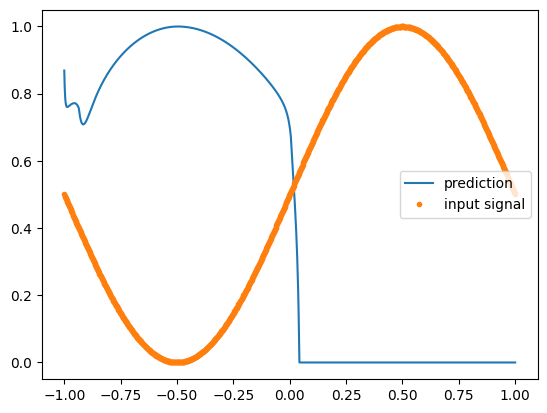

In [13]:
# eval grn
period = 2
t = np.linspace(-1, 1, 1000)
input_sig = 0.5*np.sin(2*np.pi*t/period) + 0.5

best_grn = best_ind.grn

best_grn.setup()
best_grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    best_grn.set_input(input_sig[i])
    best_grn.step()
    y_eval.append(best_grn.get_output().item())


plt.plot(t, y_eval, label="prediction")
plt.plot(t, input_sig, '.', label="input signal")

plt.legend()

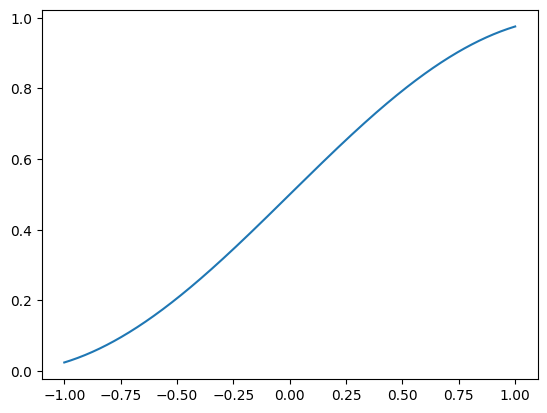

In [ ]:

y_train = 0.5*np.sin(2*np.pi*t/(period*0.5)) + 0.5
plt.plot(t, y_train)

# REINFORCEMENT WITH GRN 

In [2]:
import gymnasium as gym
from gymnasium import wrappers
from pygrn import grns, problems, evolution, config
import numpy as np
from loguru import logger   
class RLCorrector(problems.base.Problem):

    def __init__(self, env_name="Pendulum-v1"): 

        namestr = env_name
        super().__init__(namestr)

        # self.train_env = wrappers.NormalizeObservation(gym.make(env_name))
        self.vis_env = gym.make(env_name, render_mode="human")
        
        action_space = self.vis_env.action_space
        observation_space = self.vis_env.observation_space
        self.has_continuous_action = isinstance(action_space, gym.spaces.Box)
        self.has_continuous_observation = isinstance(observation_space, gym.spaces.Box)
        self.nin = self.vis_env.observation_space.shape[0]

        self.dtype = float


        if self.has_continuous_observation:
            self.nin = self.vis_env.observation_space.shape[0]
            self.h_obs = self.vis_env.observation_space.high
            self.l_obs = self.vis_env.observation_space.low
            self.dtype = float


        if self.has_continuous_action:
            self.nout = self.vis_env.action_space.shape[0]
            self.h_act = self.vis_env.action_space.high
            self.l_act = self.vis_env.action_space.low
            self.dtype = int

        else:
            self.nout = 1
            self.n = self.vis_env.action_space.n
        
        self.cacheable = True


    def eval(self, grn, render = False):
        
        n_eval_episode = 1

        fit = 0
        reward = 0
        ts = 0

        while len(envs) < 1:
            pass
        eval_env = envs.pop()

        for i in range(n_eval_episode):
            grn.setup()
            grn.warmup(25)

            obs, _ = eval_env.reset(seed=0)
            done = False

            while True:


                # if self.has_continuous_observation:
                #     (obs - self.l_obs) / (self.h_obs - self.l_obs)  # map action to [0, 1]
                grn.set_input(obs)
                grn.step()
                # print("grn best output ", grn.get_output().item())
                if self.has_continuous_action:
                    action = grn.get_output() * (self.h_act - self.l_act) + self.l_act
                else:
                    action = int(grn.get_output()[0] * (self.n - 1))

                # print("action ", action)s
                # print(action)
                # action = 1 if grn.get_output().item() > 0.5 else 0
                obs, r, terminated, truncated, info = eval_env.step(action)
            
                if terminated or truncated:
                    done = True
                    break
                reward += r
                ts += 1
  
            fit = reward / n_eval_episode

            # if fit ==0:
                # logger.debug(f"fit = {fit} ")

        envs.append(eval_env)
        # print("reward = ", reward, "\t steps = ", ts)
        return fit 
    
    def visualize_grn(self, grn):
    

        fit = 0
        reward = 0
        ts = 0
        grn.setup()
        grn.warmup(25)

        obs, _ = self.vis_env.reset(seed=0)
        done = False

        actions = []
        while True:


            # if self.has_continuous_observation:
            #     obs = (obs - self.l_obs) / (self.h_obs - self.l_obs)  # map action to [0, 1]
            grn.set_input(obs)
            grn.step()
            # print("grn best output ", grn.get_output().item())
            if self.has_continuous_action:
                action = grn.get_output() * (self.h_act - self.l_act) + self.l_act
            else:
                action = np.round(grn.get_output() * (self.n - 1)).item()
            
            actions.append(action)
            # action = 1 if grn.get_output().item() > 0.5 else 0
            obs, r, terminated, truncated, info = self.vis_env.step(action)
            
            if terminated or truncated:
                done = True
                break
            reward += r
            ts += 1


        fit = reward


        # if fit == 0:
        # logger.debug(f"fit = {fit} , nsteps = {ts}")
        # self.eval_env.close()
        # print("reward = ", reward, "\t steps = ", ts)
        return fit
    


env_name = 'InvertedDoublePendulum-v5'
num_workers = 30
global envs
envs = [ gym.make(env_name) for _ in range(num_workers)]



problem = RLCorrector(env_name)

In [4]:
# evolve grn
n_gens = 200

grn = lambda : grns.DissetGRN()
# grn = lambda : grns.ClassicGRN()

grneat = evolution.Evolution(problem, grn, num_workers=num_workers)
best_fit, best_ind = grneat.run(n_gens)


logger.info(f"best fit: {best_fit}")
logger.info(f"best ind: {best_ind.grn}")

with open(env_name + ".grn", 'w') as f:
    f.write(str(best_ind.grn) + '\n')


2025-07-23 16:34:17.113 | INFO     | pygrn.evolution.evolution:report:80 - Generation 0: best fit 137.4438875540548, fit mean 30.25063377352799, fit std 8.948368870168796
2025-07-23 16:34:19.406 | INFO     | pygrn.evolution.evolution:report:80 - Generation 1: best fit 147.52847113248828, fit mean 36.74957032280557, fit std 17.01561751706242
2025-07-23 16:34:21.884 | INFO     | pygrn.evolution.evolution:report:80 - Generation 2: best fit 222.6967178404518, fit mean 40.29326781171925, fit std 52.457711884394804
2025-07-23 16:34:24.947 | INFO     | pygrn.evolution.evolution:report:80 - Generation 3: best fit 305.482765604535, fit mean 48.12017084304485, fit std 62.32450397283346
2025-07-23 16:34:28.451 | INFO     | pygrn.evolution.evolution:report:80 - Generation 4: best fit 305.482765604535, fit mean 47.24177347391858, fit std 133.35573423748986
2025-07-23 16:34:46.524 | INFO     | pygrn.evolution.evolution:report:80 - Generation 5: best fit 305.482765604535, fit mean 65.3632640540836, f

In [ ]:

fit_eval = problem.eval(best_ind.grn)


fit_viz = problem.visualize_grn(best_ind.grn)

print(fit_eval)


# best_fit

818.8740705239586


: 

In [21]:
with open("mujuco_double_pendulum.grn", 'w') as f:
    f.write(str(best_ind.grn) + '\n')


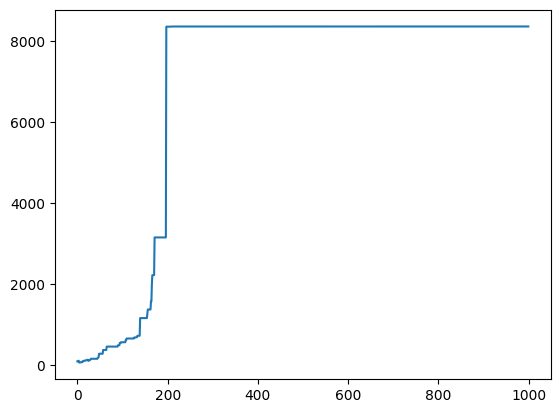

In [20]:
plt.plot(grneat.best_fit_history)